Name : Gourav Verma<br>
Class : DSC540-T303<br>
Assignment : Project<br>
Topic : Data Wrangling on Mutual Funds<br>

In [2]:
# Import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from bs4 import BeautifulSoup
import requests

In [3]:
# Load the data

def load_data():
    """
    Load Mutual Fund dataset
    """
    df_mf = pd.read_csv('Mutual Funds.csv', parse_dates=[9])
    
    return df_mf

In [4]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Missing Values'})
        mz_table['Total Zero + Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero + Missing Values'] = 100 * mz_table['Total Zero + Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        print ("There are ", sum(mz_table['% of Missing Values'] > 50), "columns having greater than 50% missing value.")
        print ("There are ", sum(mz_table['% of Missing Values'] > 40), "columns having greater than 40% missing value.")
        print ("There are ", sum(mz_table['% of Missing Values'] > 30), "columns having greater than 30% missing value.")
        print ("There are ", sum(mz_table['% of Missing Values'] > 20), "columns having greater than 20% missing value.")
        print ("There are ", sum(mz_table['% of Missing Values'] > 10), "columns having greater than 10% missing value.")

        return mz_table

In [5]:
def CleanDf(df):
    # Create new dataset with selected columns
    df_clean = df.filter(['fund_name', 'fund_extended_name', 'fund_family', 'net_assets', 
                    'ytd_return', 'fund_yield', 'morningstar_rating', 'inception_date', 
                    'investment', 'size', 'net_annual_expense_ratio_fund', 'price_earnings', 
                    'price_book', 'morningstar_return_rating', 'fund_return_1month', 
                    'fund_return_3months', 'fund_return_1year', 'fund_return_3years', 
                    'fund_return_5years', 'fund_return_10years', 'fund_return_2018', 'portfolio_cash', 
                    'portfolio_stocks', 'portfolio_bonds', 'portfolio_others', 'portfolio_preferred', 
                    'portfolio_convertable', 'basic_materials', 'consumer_cyclical', 'financial_services', 
                    'real_estate', 'consumer_defensive', 'healthcare', 'utilities', 'communication_services', 
                    'energy', 'industrials', 'technology', 'morningstar_risk_rating', 'fund_alpha_3years', 
                    'fund_beta_3years', 'fund_r_squared_3years', 'fund_standard_deviation_3years', 
                    'fund_sharpe_ratio_3years', 'fund_treynor_ratio_3years'], axis=1)
    
    # Fix NaN
    df_clean.replace('', 'NaN', inplace=True)
    df_clean.replace('nan', 'NaN', inplace=True)
    df_clean.replace('NaN', np.nan, inplace=True)
    
    # Divide net assets columns by 1 Million for easier understanding.
    df_clean['net_assets'] = df_clean['net_assets']/1000000
    
    # Convert objects to numeric
    df_clean["price_earnings"] = pd.to_numeric(df_clean.price_earnings, errors='coerce')
    
    # Rename column
    df_clean.rename(columns={'size': 'f_size'}, inplace=True)
    
    return df_clean

In [6]:
# Read Mutual_Fund CSV file
df_mf = load_data()

# Describe the dataframe
df_mf.info()
df_mf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25308 entries, 0 to 25307
Columns: 125 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(109), int64(1), object(15)
memory usage: 24.1+ MB


C:\Users\goura\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,fund_name,fund_extended_name,category,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,World Allocation,DWS,5.302800e+08,12.79,1.43,3,2007-07-29,Blend,...,0.31,0.00,0.73,0.01,5.05,0.05,2.26,0.02,6.71,0.07
1,AAADX,Aberdeen Income Builder Fund Class A,Large Blend,Aberdeen,8.884000e+07,9.21,2.62,2,2011-12-29,Blend,...,0.62,0.01,0.97,0.01,11.55,0.11,6.91,0.08,12.77,0.14
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Large Growth,Thrivent Funds,1.080000e+09,16.00,0.00,3,1999-10-28,Growth,...,0.86,0.01,1.01,0.01,12.65,0.13,10.22,0.10,13.44,0.15
3,AAAIX,American Century Strategic Allocation: Aggress...,Allocation - 70% to 85% Equity,American Century Investments,7.852700e+08,11.57,1.38,4,2000-07-31,Growth,...,0.63,0.01,1.00,0.01,5.77,0.05,4.14,0.03,8.24,0.08
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Tactical Allocation,Horizon Investments,5.271300e+08,11.62,0.66,4,2012-01-30,Blend,...,0.47,0.00,NaN,0.01,4.5,0.04,2.98,0.03,NaN,0.09


In [7]:
# Clean dataframe and select important columns for analysis.
dfc_mf = CleanDf(df_mf)

In [8]:
# Check missing value stats
missing_zero_values_table(dfc_mf)

Your selected dataframe has 45 columns and 25308 Rows.
There are 39 columns that have missing values.
There are  0 columns having greater than 50% missing value.
There are  0 columns having greater than 40% missing value.
There are  0 columns having greater than 30% missing value.
There are  0 columns having greater than 20% missing value.
There are  0 columns having greater than 10% missing value.


,Zero Values,Missing Values,% of Missing Values,Total Zero + Missing Values,% Total Zero + Missing Values,Data Type
fund_treynor_ratio_3years,1,1669,6.6,1670,6.6,object
fund_sharpe_ratio_3years,50,1669,6.6,1719,6.8,float64
fund_standard_deviation_3years,0,1669,6.6,1669,6.6,float64
fund_r_squared_3years,12,1669,6.6,1681,6.6,float64
fund_beta_3years,33,1669,6.6,1702,6.7,float64
fund_alpha_3years,52,1669,6.6,1721,6.8,float64
investment,0,1502,5.9,1502,5.9,object
f_size,0,1502,5.9,1502,5.9,object
fund_return_2018,18,954,3.8,972,3.8,float64
price_earnings,6107,134,0.5,6241,24.7,float64


In [9]:
# Remove null values
dfn_mf = dfc_mf.dropna()
nRow, nCol = dfn_mf.shape
oRow, oCol = dfc_mf.shape
print(f'There are {nRow} rows and {nCol} columns, after removing all rows with null values')
print('This way we will be removing', round((oRow-nRow)/oRow * 100, 2), '% rows from our dataframe')

There are 21750 rows and 45 columns, after removing all rows with null values
This way we will be removing 14.06 % rows from our dataframe


**As we have less than 10% missing values among all the variables. So, keeping them won't hurt the result much. We will proceed with using dataframe with missing values**

{'whiskers': [<matplotlib.lines.Line2D at 0x1b731b9bf88>,
 'caps': [<matplotlib.lines.Line2D at 0x1b731ba1fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b731b58ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b731ba4f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b731ba4fc8>],
 'means': []}

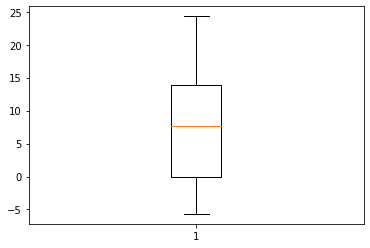

In [20]:
#plt.boxplot(dfn_mf['price_earnings'].loc[dfn_mf['f_size'] == 'Medium'])
plt.boxplot(dfn_mf['fund_return_10years'].loc[dfn_mf['f_size'] == 'Small'])